In [231]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [232]:
df = pd.read_excel ('HealthCareData.xlsx')
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [233]:
df.shape

(950, 42)

In [234]:
df.isnull().any()

,0
S.NO,False
Age,False
Gender,False
Place(location where the patient lives),True
Duration of alcohol consumption(years),False
Quantity of alcohol consumption (quarters/day),False
Type of alcohol consumed,False
Hepatitis B infection,False
Hepatitis C infection,False
Diabetes Result,False


In [235]:
df.isnull().sum()

,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),134
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [236]:
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

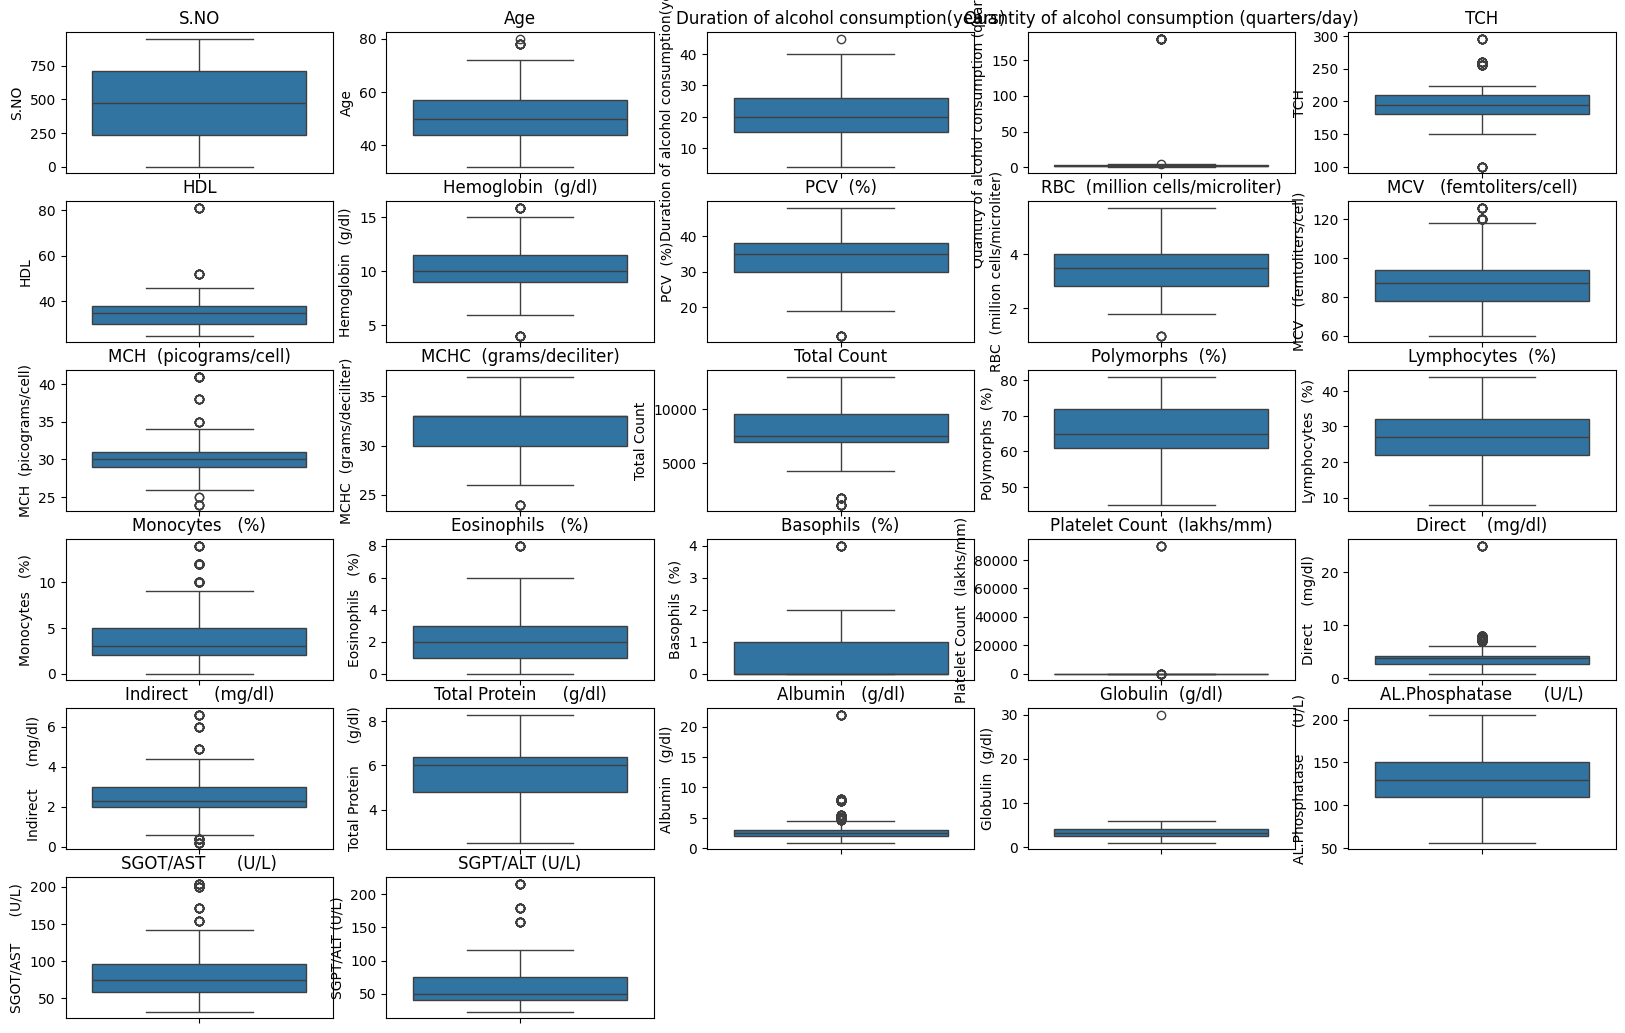

In [237]:
c = 0
plt.figure(figsize=(20, 15))

# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

for i in numeric_cols:
    plt.subplot(7, 5, c + 1)
    sns.boxplot(df[i])
    plt.title(i)
    c += 1

plt.show()

In [238]:
q1= df['Eosinophils   (%)'].quantile (0.25)
q3 = df['Eosinophils   (%)'].quantile (0.75)
iqr = q3 - q1
q1,q3,iqr
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit, upper_limit
df['Eosinophils   (%)'] = np.where(df [ 'Eosinophils   (%)'] > upper_limit, upper_limit,
                            np.where(df['Eosinophils   (%)'] < lower_limit, lower_limit, df['Eosinophils   (%)']))

<Axes: ylabel='Eosinophils   (%)'>

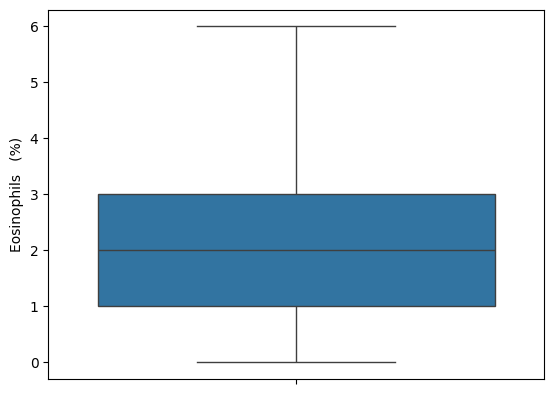

In [239]:
sns.boxplot(df['Eosinophils   (%)'])

<Axes: ylabel='Basophils  (%)'>

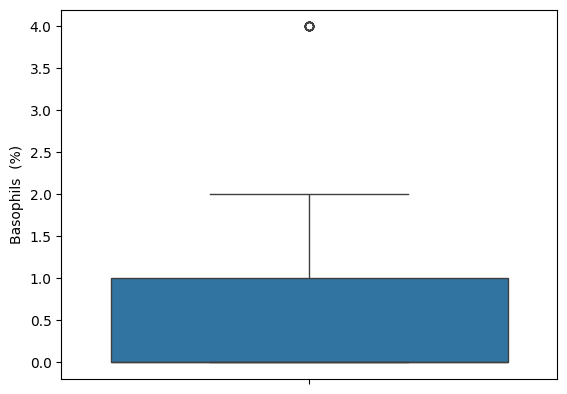

In [240]:
sns.boxplot(df['Basophils  (%)'])

In [241]:
q1=df['Basophils  (%)'].quantile (0.25)
q3=df['Basophils  (%)'].quantile (0.75)
iqr = q3 - q1
q1,q3, iqr
upper_limit = q3+ (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit, upper_limit
df['Basophils  (%)'] = np.where(df['Basophils  (%)'] > upper_limit, upper_limit,
                                 np.where(df['Basophils  (%)'] < lower_limit, lower_limit, df['Basophils  (%)']))

<Axes: ylabel='Basophils  (%)'>

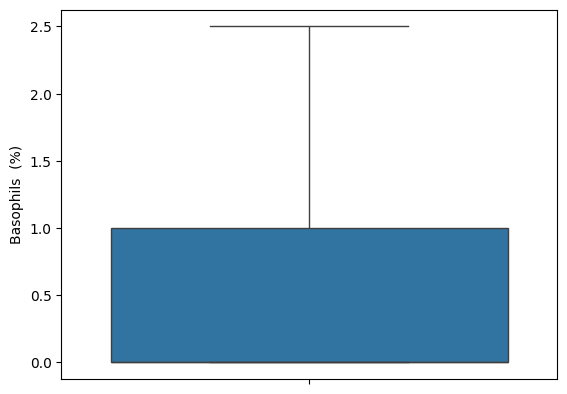

In [242]:
sns.boxplot(df['Basophils  (%)'])

<Axes: ylabel='Platelet Count  (lakhs/mm)'>

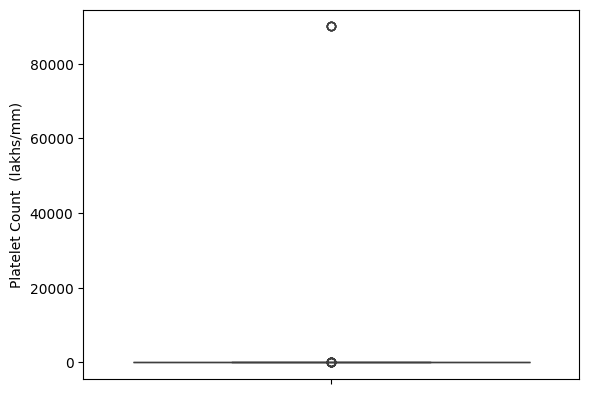

In [243]:
sns.boxplot(df['Platelet Count  (lakhs/mm)'])

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
# Drop rows where the target variable is NaN
df_cleaned = df.dropna(subset=['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']).copy()

x = df_cleaned.drop('Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)', axis=1)
y = df_cleaned['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [246]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
784,785,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,02:01:00,140.0,96,80,YES
420,421,35,female,NaN,16,2,country liquor,negative,negative,YES,...,4.2,2.2,7.1,2.0,5.1,NaN,76.0,59,48,YES
754,755,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,02:01:00,140.0,96,80,YES
869,870,58,male,urban,40,180,branded liquor,negative,negative,YES,...,2.3,2.0,4.3,2.0,2.3,0.86,140.0,60,42,YES
128,129,46,male,urban,12,2,country liquor,negative,negative,YES,...,5.0,1.0,8.0,5.0,3.0,1.66,130.0,110,90,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,46,male,urban,12,2,country liquor,negative,negative,YES,...,5.0,1.0,8.0,5.0,3.0,1.66,130.0,110,90,YES
286,287,52,male,urban,12,1,country liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,0.75,110.0,58,35,YES
914,915,49,male,rural,15,3,both,negative,negative,YES,...,7.9,6.6,3.4,NaN,NaN,NaN,150.0,56,43,no
473,474,42,male,rural,22,2,country liquor,negative,negative,YES,...,3.4,3.2,5.0,2.0,3.0,NaN,98.0,126,76,YES


In [247]:
x_test

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
759,760,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,NaN,140.0,96,80,YES
478,479,42,male,rural,18,2,country liquor,negative,negative,YES,...,4.0,4.4,5.6,1.6,4.0,NaN,98.0,32,23,YES
563,564,56,male,NaN,20,2,branded liquor,negative,negative,NO,...,4.0,4.4,4.0,1.5,2.5,0.6:1,102.0,94,86,YES
770,771,50,male,NaN,14,2,country liquor,negative,negative,YES,...,4.1,3.7,6.2,2.8,3.1,NaN,117.0,56,48,YES
41,42,43,male,urban,12,2,both,negative,negative,YES,...,5.4,3.0,6.3,3.4,2.8,1.214,156.0,45,37,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,899,43,male,urban,20,2,both,negative,negative,YES,...,3.1,NaN,NaN,2.5,4.1,0.6,180.0,94,46,YES
26,27,45,male,urban,15,3,both,negative,negative,YES,...,3.8,0.4,NaN,2.3,4.0,0.575,139.0,56,48,YES
89,90,40,male,urban,10,1,country liquor,negative,negative,YES,...,8.0,2.0,6.0,1.2,4.8,NaN,108.0,79,56,YES
11,12,44,male,urban,15,2,branded liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,0.75,115.0,55,35,YES


In [248]:
y_train

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
784,YES
420,YES
754,YES
869,YES
128,YES
...,...
116,YES
286,YES
914,YES
473,YES


In [249]:
y_test

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
759,YES
478,YES
563,YES
770,YES
41,YES
...,...
898,YES
26,YES
89,YES
11,YES


In [250]:
df.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,941.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,87.651435,...,0.481909,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,13.844181,...,0.644771,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,60.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,78.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,126.000000,...,2.500000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


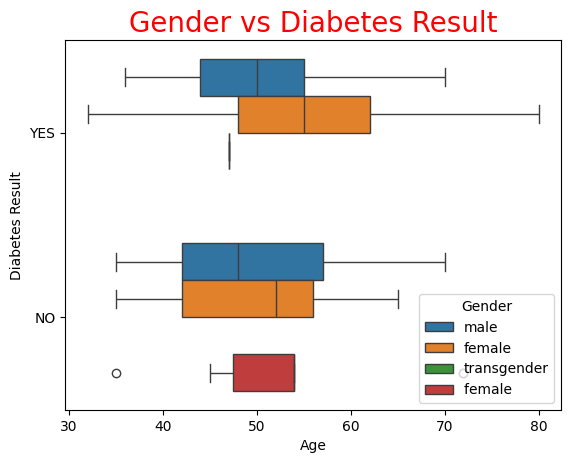

In [251]:
sns.boxplot(x='Age',y='Diabetes Result',data=df,hue='Gender')
plt.title('Gender vs Diabetes Result', color = 'red',size=20)
plt.show()

<Axes: xlabel='Place(location where the patient lives)', ylabel='Age'>

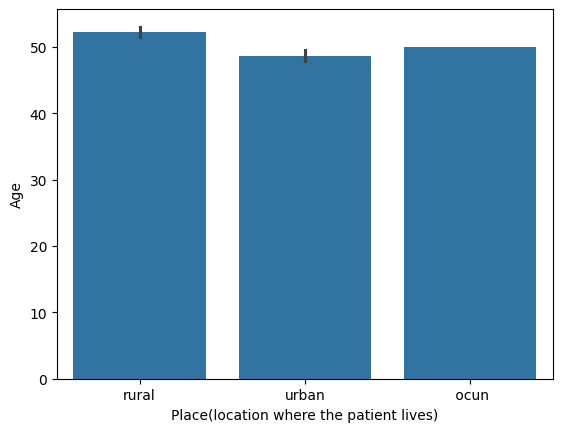

In [252]:
sns.barplot(x=df['Place(location where the patient lives)'],y=df['Age'])

Text(0.5, 1.0, 'Place vs Age')

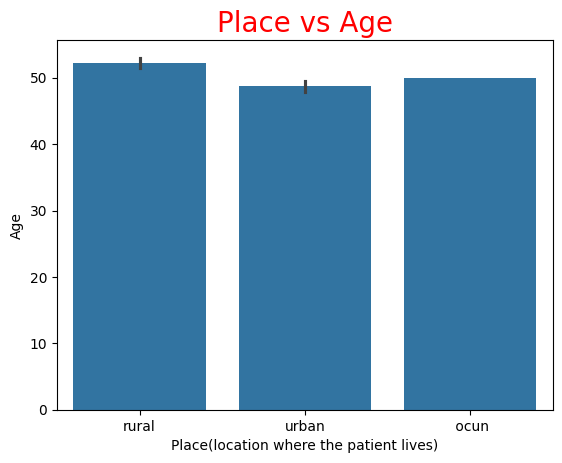

In [253]:
sns.barplot(x=df['Place(location where the patient lives)'],y='Age',data=df)
plt.title('Place vs Age', color = 'red',size=20)

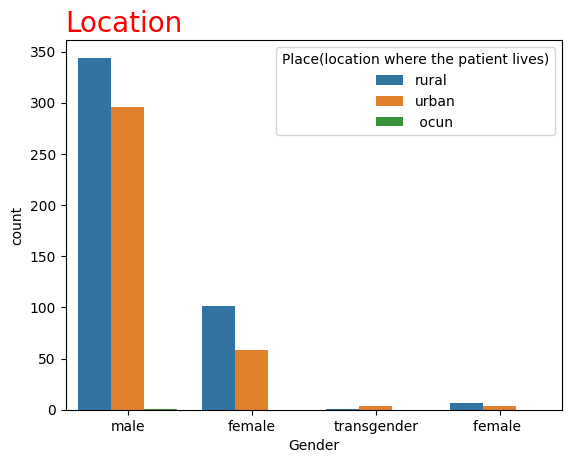

In [254]:
sns.countplot(data=df,x='Gender',hue='Place(location where the patient lives)')
plt.title("Location",color='red',size=20,loc='left')
plt.show()

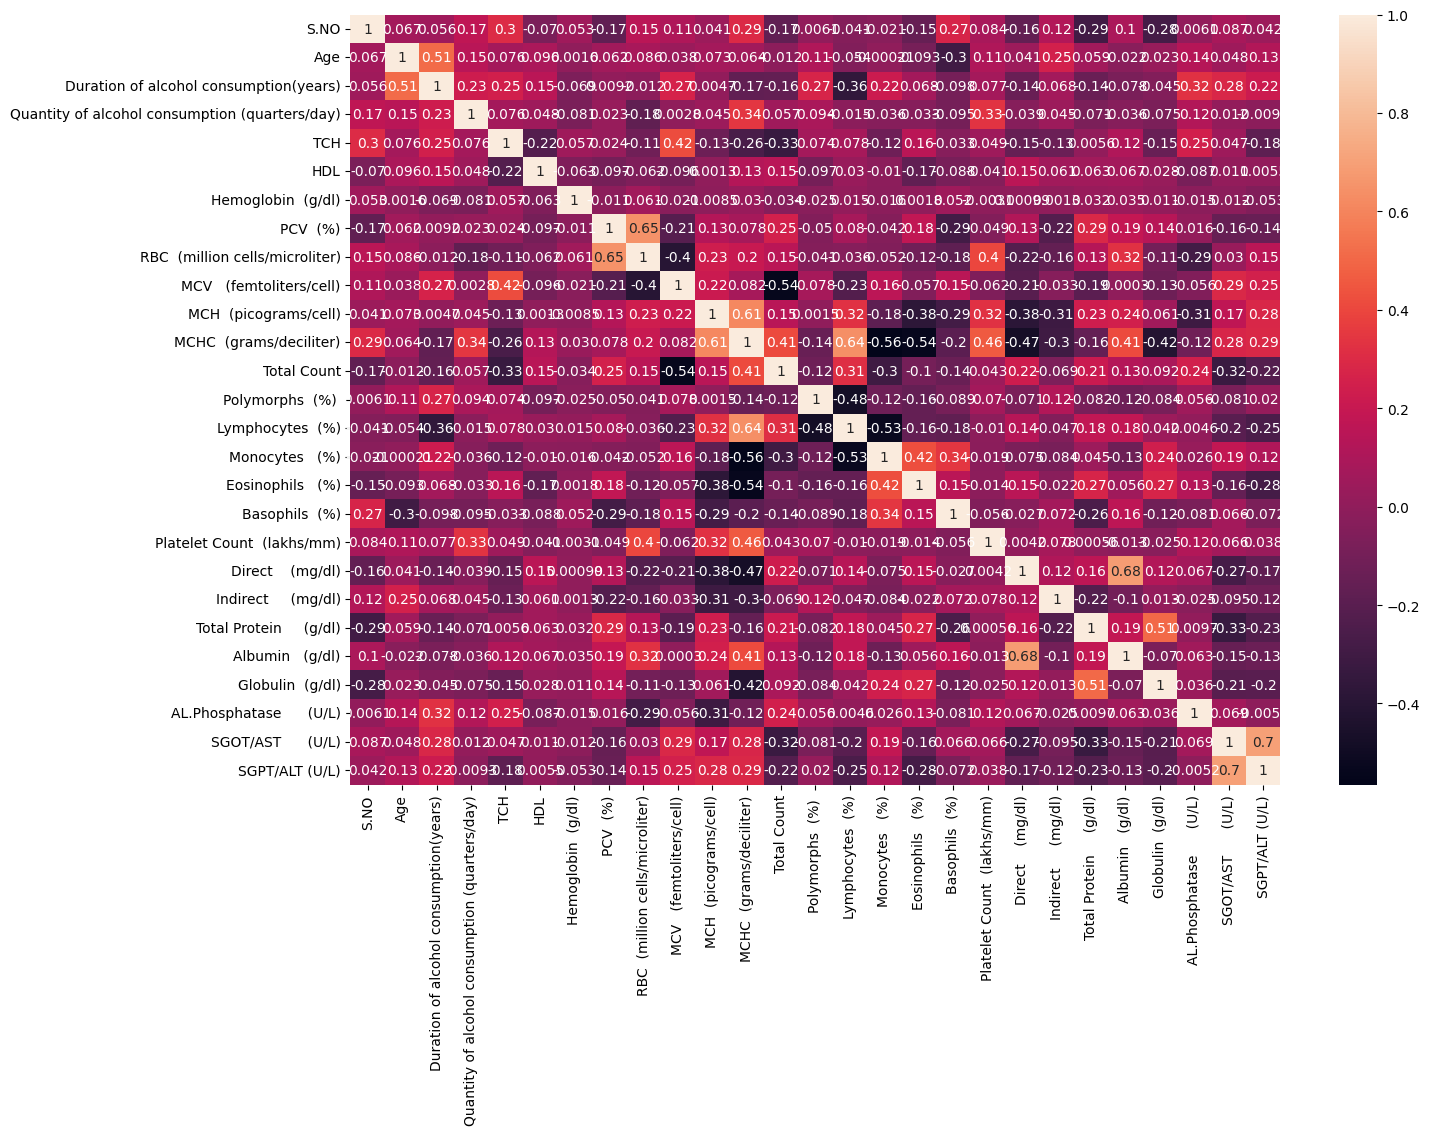

In [255]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
# Removed redundant train-test split

In [258]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
784,785,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,02:01:00,140.0,96,80,YES
420,421,35,female,NaN,16,2,country liquor,negative,negative,YES,...,4.2,2.2,7.1,2.0,5.1,NaN,76.0,59,48,YES
754,755,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,02:01:00,140.0,96,80,YES
869,870,58,male,urban,40,180,branded liquor,negative,negative,YES,...,2.3,2.0,4.3,2.0,2.3,0.86,140.0,60,42,YES
128,129,46,male,urban,12,2,country liquor,negative,negative,YES,...,5.0,1.0,8.0,5.0,3.0,1.66,130.0,110,90,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,46,male,urban,12,2,country liquor,negative,negative,YES,...,5.0,1.0,8.0,5.0,3.0,1.66,130.0,110,90,YES
286,287,52,male,urban,12,1,country liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,0.75,110.0,58,35,YES
914,915,49,male,rural,15,3,both,negative,negative,YES,...,7.9,6.6,3.4,NaN,NaN,NaN,150.0,56,43,no
473,474,42,male,rural,22,2,country liquor,negative,negative,YES,...,3.4,3.2,5.0,2.0,3.0,NaN,98.0,126,76,YES


In [259]:
x_test

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
759,760,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,NaN,140.0,96,80,YES
478,479,42,male,rural,18,2,country liquor,negative,negative,YES,...,4.0,4.4,5.6,1.6,4.0,NaN,98.0,32,23,YES
563,564,56,male,NaN,20,2,branded liquor,negative,negative,NO,...,4.0,4.4,4.0,1.5,2.5,0.6:1,102.0,94,86,YES
770,771,50,male,NaN,14,2,country liquor,negative,negative,YES,...,4.1,3.7,6.2,2.8,3.1,NaN,117.0,56,48,YES
41,42,43,male,urban,12,2,both,negative,negative,YES,...,5.4,3.0,6.3,3.4,2.8,1.214,156.0,45,37,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,899,43,male,urban,20,2,both,negative,negative,YES,...,3.1,NaN,NaN,2.5,4.1,0.6,180.0,94,46,YES
26,27,45,male,urban,15,3,both,negative,negative,YES,...,3.8,0.4,NaN,2.3,4.0,0.575,139.0,56,48,YES
89,90,40,male,urban,10,1,country liquor,negative,negative,YES,...,8.0,2.0,6.0,1.2,4.8,NaN,108.0,79,56,YES
11,12,44,male,urban,15,2,branded liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,0.75,115.0,55,35,YES


In [260]:
y_train

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
784,YES
420,YES
754,YES
869,YES
128,YES
...,...
116,YES
286,YES
914,YES
473,YES


In [261]:
y_test

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
759,YES
478,YES
563,YES
770,YES
41,YES
...,...
898,YES
26,YES
89,YES
11,YES


In [262]:
from sklearn.naive_bayes import GaussianNB
# Removed direct fitting and imputation as these should be handled within a pipeline

In [263]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
784,785,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,02:01:00,140.0,96,80,YES
420,421,35,female,NaN,16,2,country liquor,negative,negative,YES,...,4.2,2.2,7.1,2.0,5.1,NaN,76.0,59,48,YES
754,755,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,02:01:00,140.0,96,80,YES
869,870,58,male,urban,40,180,branded liquor,negative,negative,YES,...,2.3,2.0,4.3,2.0,2.3,0.86,140.0,60,42,YES
128,129,46,male,urban,12,2,country liquor,negative,negative,YES,...,5.0,1.0,8.0,5.0,3.0,1.66,130.0,110,90,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,46,male,urban,12,2,country liquor,negative,negative,YES,...,5.0,1.0,8.0,5.0,3.0,1.66,130.0,110,90,YES
286,287,52,male,urban,12,1,country liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,0.75,110.0,58,35,YES
914,915,49,male,rural,15,3,both,negative,negative,YES,...,7.9,6.6,3.4,NaN,NaN,NaN,150.0,56,43,no
473,474,42,male,rural,22,2,country liquor,negative,negative,YES,...,3.4,3.2,5.0,2.0,3.0,NaN,98.0,126,76,YES


In [264]:
y_train

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
784,YES
420,YES
754,YES
869,YES
128,YES
...,...
116,YES
286,YES
914,YES
473,YES


In [265]:
from sklearn.ensemble import RandomForestClassifier
# Removed direct fitting as this should be handled within a pipeline

In [266]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
784,785,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,02:01:00,140.0,96,80,YES
420,421,35,female,NaN,16,2,country liquor,negative,negative,YES,...,4.2,2.2,7.1,2.0,5.1,NaN,76.0,59,48,YES
754,755,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,02:01:00,140.0,96,80,YES
869,870,58,male,urban,40,180,branded liquor,negative,negative,YES,...,2.3,2.0,4.3,2.0,2.3,0.86,140.0,60,42,YES
128,129,46,male,urban,12,2,country liquor,negative,negative,YES,...,5.0,1.0,8.0,5.0,3.0,1.66,130.0,110,90,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,46,male,urban,12,2,country liquor,negative,negative,YES,...,5.0,1.0,8.0,5.0,3.0,1.66,130.0,110,90,YES
286,287,52,male,urban,12,1,country liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,0.75,110.0,58,35,YES
914,915,49,male,rural,15,3,both,negative,negative,YES,...,7.9,6.6,3.4,NaN,NaN,NaN,150.0,56,43,no
473,474,42,male,rural,22,2,country liquor,negative,negative,YES,...,3.4,3.2,5.0,2.0,3.0,NaN,98.0,126,76,YES


In [267]:
y_train

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
784,YES
420,YES
754,YES
869,YES
128,YES
...,...
116,YES
286,YES
914,YES
473,YES


In [268]:
from sklearn.linear_model import LogisticRegression
# Removed direct fitting as this should be handled within a pipeline

In [269]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
784,785,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,02:01:00,140.0,96,80,YES
420,421,35,female,NaN,16,2,country liquor,negative,negative,YES,...,4.2,2.2,7.1,2.0,5.1,NaN,76.0,59,48,YES
754,755,36,male,rural,14,2,country liquor,negative,negative,YES,...,4.2,2.6,6.2,4.0,2.2,02:01:00,140.0,96,80,YES
869,870,58,male,urban,40,180,branded liquor,negative,negative,YES,...,2.3,2.0,4.3,2.0,2.3,0.86,140.0,60,42,YES
128,129,46,male,urban,12,2,country liquor,negative,negative,YES,...,5.0,1.0,8.0,5.0,3.0,1.66,130.0,110,90,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,46,male,urban,12,2,country liquor,negative,negative,YES,...,5.0,1.0,8.0,5.0,3.0,1.66,130.0,110,90,YES
286,287,52,male,urban,12,1,country liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,0.75,110.0,58,35,YES
914,915,49,male,rural,15,3,both,negative,negative,YES,...,7.9,6.6,3.4,NaN,NaN,NaN,150.0,56,43,no
473,474,42,male,rural,22,2,country liquor,negative,negative,YES,...,3.4,3.2,5.0,2.0,3.0,NaN,98.0,126,76,YES


In [270]:
y_train

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
784,YES
420,YES
754,YES
869,YES
128,YES
...,...
116,YES
286,YES
914,YES
473,YES


In [271]:
from sklearn.neighbors import KNeighborsClassifier

In [272]:
from sklearn.neighbors import KNeighborsClassifier
# Removed direct fitting as this should be handled within a pipeline

In [273]:
print("x_train",x_train)
print("y_train",y_train)

x_train      S.NO  Age  Gender Place(location where the patient lives)  \
784   785   36    male                                   rural   
420   421   35  female                                     NaN   
754   755   36    male                                   rural   
869   870   58    male                                   urban   
128   129   46    male                                   urban   
..    ...  ...     ...                                     ...   
116   117   46    male                                   urban   
286   287   52    male                                   urban   
914   915   49    male                                   rural   
473   474   42    male                                   rural   
112   113   46    male                                   urban   

     Duration of alcohol consumption(years)  \
784                                      14   
420                                      16   
754                                      14   
869        

In [274]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [275]:
k = np.random.randint(1,50,60)

In [276]:
params = {'n_neighbors' : k}

In [284]:
from sklearn.metrics import accuracy_score

# Step 1: Get the best estimator (the fitted pipeline)
best_pipeline = random_search.best_estimator_

# Step 2: Extract the preprocessor and classifier steps
preprocessor_step = best_pipeline.named_steps['preprocessor']
classifier_step = best_pipeline.named_steps['classifier']

# Step 3: Process test data and make predictions
x_test_processed = preprocessor_step.transform(x_test)
y_pred_test = classifier_step.predict(x_test_processed)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Step 4: Process training data and make predictions
x_train_processed = preprocessor_step.transform(x_train)
y_pred_train = classifier_step.predict(x_train_processed)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Step 5: Print results
print('Train Accuracy:', train_accuracy)
print('Test Accuracy :', test_accuracy)

Train Accuracy: 1.0
Test Accuracy : 1.0


In [281]:
best_pipeline = random_search.best_estimator_

# Separate the preprocessor step
preprocessor_step = best_pipeline.named_steps['preprocessor']

# Apply the preprocessor to a small sample of x_test
x_test_sample_processed = preprocessor_step.transform(x_test.head())

# Display the processed sample and its data types
print("Processed x_test sample (first 5 rows):")
print(x_test_sample_processed)

print("\nData type of the processed sample:")
print(type(x_test_sample_processed))

if hasattr(x_test_sample_processed, 'dtype'):
    print("\nData type of elements in the processed sample:")
    print(x_test_sample_processed.dtype)

# Check for non-numeric values in the processed sample if it's a numpy array
if isinstance(x_test_sample_processed, np.ndarray):
    print("\nChecking for non-numeric values in processed sample:")
    non_numeric_elements = []
    for row in x_test_sample_processed:
        for item in row:
            if not isinstance(item, (int, float, np.number)):
                non_numeric_elements.append(item)
    if non_numeric_elements:
      print("Found non-numeric elements:", non_numeric_elements)
    else:
        print("No non-numeric elements found.")

Processed x_test sample (first 5 rows):
[[  0.   0.   1. ... 140.  96.  80.]
 [  0.   0.   1. ...  98.  32.  23.]
 [  0.   0.   1. ... 102.  94.  86.]
 [  0.   0.   1. ... 117.  56.  48.]
 [  0.   0.   1. ... 156.  45.  37.]]

Data type of the processed sample:
<class 'numpy.ndarray'>

Data type of elements in the processed sample:
float64

Checking for non-numeric values in processed sample:
No non-numeric elements found.


In [282]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Identify categorical columns based on inspection of the data and previous outputs
# Explicitly list all columns that contain string values and should be one-hot encoded
categorical_cols_to_encode = [
    'Gender',
    'Place(location where the patient lives)',
    'Type of alcohol consumed',
    'Hepatitis B infection',
    'Hepatitis C infection',
    'Diabetes Result',
    'Blood pressure (mmhg)',
    'Obesity',
    'Family history of cirrhosis/ hereditary',
    'TG', # TG was identified as having mixed types/strings
    'LDL', # LDL was identified as having mixed types/strings
    'Total Bilirubin    (mg/dl)', # This column name has spaces and might have string issues
    'A/G Ratio', # This column has string values like '03:01:00'
    'USG Abdomen (diffuse liver or  not)',
    # 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)' is the target variable (y) and should not be in x
]
for col in categorical_cols_to_encode:
    if col in x_train.columns: # Check if column exists in x_train
        x_train[col] = x_train[col].astype(str)
        x_test[col] = x_test[col].astype(str)
    else:
        print(f"Warning: Column '{col}' not found in x_train. Skipping string conversion for this column.")


# Impute missing values in x_train and x_test (re-applying to be sure after string conversion)
# This imputation logic should ideally be part of the pipeline for robustness,
# but keeping it separate for now to address the encoding issue.
for col in x_train.columns:
    # Check if column is numeric before trying to calculate mean
    if x_train[col].dtype in ['int64', 'float64']:
        mean_val = x_train[col].mean()
        x_train[col].fillna(mean_val, inplace=True)
        x_test[col].fillna(mean_val, inplace=True)
    # No need to impute categorical columns after converting to string, NaN becomes 'nan' string


# Create a column transformer for one-hot encoding. Set sparse_output=False for dense output.
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols_to_encode)
    ],
    remainder='passthrough' # Pass through any columns not in categorical_cols_to_encode (assumed to be numeric)
)
# Create a pipeline with preprocessing and the KNN classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', knn)]) # Use the previously defined knn estimator

# Define the parameters for RandomizedSearchCV on the pipeline
params = {'classifier__n_neighbors' : k} # Prefix parameter name with the classifier step name

# Fit RandomizedSearchCV with the updated pipeline
random_search = RandomizedSearchCV(pipeline, params, n_iter=5, cv=5, n_jobs=-1, verbose=0)
random_search.fit(x_train, y_train)
import joblib

# Save the best pipeline (model) to a file
joblib.dump(random_search.best_estimator_, 'model.pkl')

/tmp/ipython-input-282-43505724.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train[col].fillna(mean_val, inplace=True)
/tmp/ipython-input-282-43505724.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

['model.pkl']

In [283]:
print('train_score - ' + str(random_search. score (x_train, y_train)))
print('test_score - '+ str(random_search.score (x_test,y_test)))

train_score - 1.0
test_score - 1.0
